# Лабораторна робота №4
## Обробка зображень та робота з наборами файлів цифрових зображень

In [11]:
import os
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
from datetime import datetime

Файл D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\document.docx не є зображенням.
Файл D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\text.txt не є зображенням.


,Name,Color Model,Format,Channels,Size,Width,Height,Full Path,Image
0,images (0).jfif,RGB,JPEG,3,0.01,201,251,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (0).jfif,
1,images (1).webp,RGB,WEBP,3,0.01,318,159,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (1).webp,
2,images (10).jfif,RGB,JPEG,3,0.00,259,194,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (10).jfif,
3,images (11).png,RGB,PNG,3,0.05,300,168,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (11).png,
4,images (12).jfif,RGB,JPEG,3,0.01,225,225,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (12).jfif,
5,images (13).png,RGB,PNG,3,0.09,300,168,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (13).png,
6,images (14).jfif,RGB,JPEG,3,0.01,300,168,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (14).jfif,
7,images (2).jfif,RGB,JPEG,3,0.01,300,168,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (2).jfif,
8,images (3).webp,RGB,WEBP,3,0.01,183,275,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (3).webp,
9,images (4).jfif,RGB,JPEG,3,0.01,267,189,D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures\images (4).jfif,

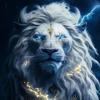
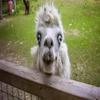
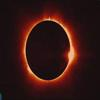
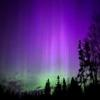
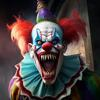
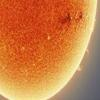
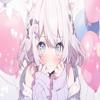
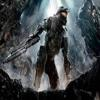
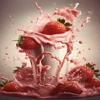
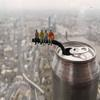
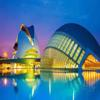
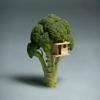
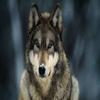
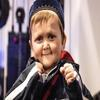
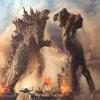

In [12]:
# Вправа 1
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def img_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def to_dataframe(folder_path):
    if not os.path.exists(folder_path):
        print("Папка не існує.")
        return None

    image_data = []

    files = glob.glob(os.path.join(folder_path, '*'))

    for file in files:
        file_info = {}
        file_info['Name'] = os.path.basename(file)

        try:
            image = Image.open(file)
            file_info['Color Model'] = image.mode
            file_info['Format'] = image.format
            file_info['Channels'] = len(image.getbands())
            file_info['Size'] = round(os.path.getsize(file) / (1024 * 1024), 2)
            file_info['Width'] = image.width
            file_info['Height'] = image.height

            file_info['Full Path'] = os.path.abspath(file)

            resized_image = image.resize((100, 100))
            file_info['Image'] = resized_image

            image_data.append(file_info)

        except Exception as e:
            print(f"Файл {file} не є зображенням.")

    df = pd.DataFrame(image_data)

    return df

dff = to_dataframe(r'D:\CodingProjects\3 курс\1 семестр\Python\Lab4\pictures')
HTML(dff.to_html(formatters={'Image': img_formatter}, escape=False))

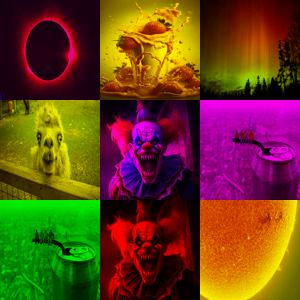

In [15]:
# Вправа 2
def redFilter(r, g, b):
    newr = r
    newg = 0
    newb = 0
    return (newr, newg, newb)

def blueFilter(r, g, b):
    newr = 0
    newg = 0
    newb = b
    return (newr, newg, newb)

def greenFilter(r, g, b):
    newr = 0
    newg = g
    newb = 0
    return (newr, newg, newb)

def yellowFilter(r, g, b):
    newr = r
    newg = g
    newb = 0
    return (newr, newg, newb)

def purpleFilter(r, g, b):
    newr = r
    newg = 0
    newb = b
    return (newr, newg, newb)

def skyblueFilter(r, g, b):
    newr = 0
    newg = g
    newb = b
    return (newr, newg, newb)

def to_poster(folder_path, output_name, num_rows, num_cols):
    image_files = dff['Full Path'].tolist()
    poster_images = []

    for _ in range(num_rows * num_cols):
        random_image_path = random.choice(image_files)
        img = Image.open(random_image_path)
        img = img.resize((100, 100))
        
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        width, height = img.size
        pixels = img.load()
        filter_choice = random.choice([redFilter, greenFilter, blueFilter, yellowFilter, purpleFilter, skyblueFilter])
        
        for y in range(height):
            for x in range(width):
                r, g, b = img.getpixel((x, y))
                pixels[x, y] = filter_choice(r, g, b)

        poster_images.append(img)

    poster_width = num_rows * 100
    poster_height = num_cols * 100
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(num_cols):
        for j in range(num_rows):
            img = poster_images[i * num_rows + j]
            poster.paste(img, (j * 100, i * 100))
    
    save_path = os.path.join(folder_path, output_name)
    
    counter = 1
    while os.path.exists(save_path):
        output_name_without_extension, file_extension = os.path.splitext(output_name)
        new_name = f"{output_name_without_extension} ({counter}){file_extension}"
        save_path = os.path.join(folder_path, new_name)
        counter += 1
    
    poster.save(save_path)
    return poster

new_poster = to_poster(r'D:\CodingProjects\3 курс\1 семестр\Python\Lab4\posters', 'poster.png', 3, 3)
new_poster